# Week 3 – CNN Embeddings on Vehicle Damage Images

## Objective
Learn how Convolutional Neural Networks automatically learn
useful representations from vehicle damage images.


In [1]:
# TODO: Import required libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



C:\Users\Tharun\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Step 1: Load and Preprocess Dataset


In [ ]:
# TODO: Load vehicle damage images
# Resize images (128x128)
# Normalize pixel values
# Create labels if provided

image_dir = "cnn_data/train"   # parent folder
img_size = (128, 128)

images = []
labels = []
class_names = sorted(os.listdir(image_dir))

for label, class_name in enumerate(class_names):
    class_path = os.path.join(image_dir, class_name)
    
    if not os.path.isdir(class_path):
        continue
    
    for file in os.listdir(class_path):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(class_path, file)

            img = cv2.imread(img_path)
            if img is None:
                continue

            # Resize image
            img = cv2.resize(img, img_size)

            # Normalize pixel values
            img = img.astype(np.float32) / 255.0

            images.append(img)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Class mapping:", dict(enumerate(class_names)))



Images shape: (11621, 128, 128, 3)
Labels shape: (11621,)
Class mapping: {0: 'damage'}


## Step 2: Define CNN Architecture
Build a small CNN to learn image features.


In [ ]:
# TODO: Define a simple CNN
from tensorflow.keras import layers, models

model = models.Sequential([
    # Conv block 1
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    # Conv block 2
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation="relu", name="embedding_layer"),
    layers.Dense(1, activation="sigmoid")
])

model.summary()



C:\Users\Tharun\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 3: Train the CNN
This step will take time

In [ ]:
# TODO: Compile and train the CNN model
# Keep training short (few epochs)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    images,
    labels,
    epochs=5,          # short training as required
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)



Epoch 1/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 54s 180ms/step - accuracy: 0.9967 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 2.4607e-21
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 52s 178ms/step - accuracy: 1.0000 - loss: 7.5922e-25 - val_accuracy: 1.0000 - val_loss: 2.4607e-21
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 53s 183ms/step - accuracy: 1.0000 - loss: 7.5922e-25 - val_accuracy: 1.0000 - val_loss: 2.4607e-21
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 53s 182ms/step - accuracy: 1.0000 - loss: 7.5922e-25 - val_accuracy: 1.0000 - val_loss: 2.4607e-21
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 54s 184ms/step - accuracy: 1.0000 - loss: 7.5922e-25 - val_accuracy: 1.0000 - val_loss: 2.4607e-21


## Step 4: Extract CNN Embeddings
Extract features from the penultimate layer.


In [6]:
# TODO: Create a model that outputs CNN embeddings

from tensorflow.keras import models

# Ensure model is built (safe even if already trained)
_ = model(images[:1])

embedding_model = models.Model(
    inputs=model.inputs,
    outputs=model.get_layer("embedding_layer").output
)

embedding_model.summary()




Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 128)            │     7,372,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,320 (28.20 MB)

 Trainable params: 7,392,320 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: PCA / t-SNE on CNN Embeddings
Visualize learned representations.


In [7]:
# Extract CNN embeddings
embeddings = embedding_model.predict(images)
print("Embeddings shape:", embeddings.shape)


364/364 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step
Embeddings shape: (11621, 128)


PCA output shape: (11621, 2)


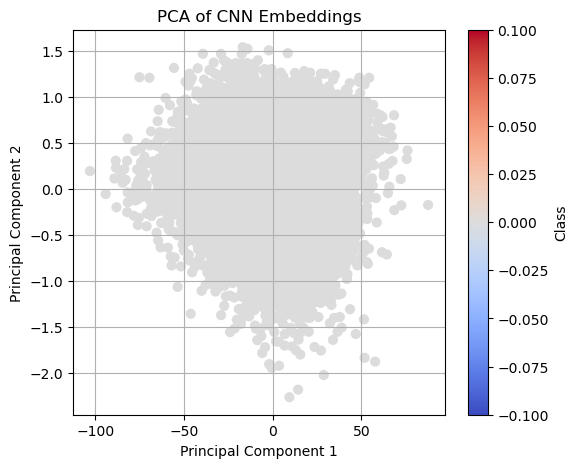

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

print("PCA output shape:", embeddings_pca.shape)

plt.figure(figsize=(6, 5))
plt.scatter(
    embeddings_pca[:, 0],
    embeddings_pca[:, 1],
    c=labels,
    cmap="coolwarm",
    s=40
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of CNN Embeddings")
plt.colorbar(label="Class")
plt.grid(True)
plt.show()


## Reflection
- How do CNN embeddings differ from HOG features?
- Why do CNN features work better for damage detection?
